In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [3]:
data = pd.read_csv('../input/lending-club/accepted_2007_to_2018Q4.csv.gz', compression='gzip')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data = data.sample(frac=0.5, axis=0, random_state=42).reset_index(drop=True)

In [6]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,39651438,NaN,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,16411620,NaN,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,45122316,NaN,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,125356772,NaN,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,128490686,NaN,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130345,8581088,NaN,12000.0,12000.0,12000.0,60 months,15.61,289.34,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1130346,5646193,NaN,19750.0,19750.0,19750.0,36 months,17.27,706.80,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1130347,9294954,NaN,11325.0,11325.0,11325.0,60 months,18.55,290.98,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1130348,59249382,NaN,5450.0,5450.0,5450.0,36 months,14.65,188.00,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data = data.drop(data.loc[:,data.isna().mean().sort_values() > 0.3].columns, axis=1)

In [20]:
data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,39651438,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,B3,Public Service,10+ years,MORTGAGE,120000.0,Verified,Feb-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,919xx,CA,24.05,0.0,Oct-1981,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,w,7181.91,7181.91,33676.200000,33676.20,24818.09,8858.11,0.0,0.0,0.0,Mar-2019,687.65,Mar-2019,794.0,790.0,0.0,1.0,Individual,0.0,0.0,457317.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,9.0,7.0,0.0,6.0,11.0,8.0,20.0,7.0,14.0,31.0,11.0,20.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N
1,16411620,9600.0,9600.0,9600.0,36 months,12.99,323.42,C,C1,NaN,NaN,RENT,21900.0,Verified,May-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,331xx,FL,10.03,0.0,Apr-2001,685.0,689.0,1.0,13.0,1.0,4509.0,38.9,20.0,w,0.00,0.00,11643.969042,11643.97,9600.00,2043.97,0.0,0.0,0.0,Jun-2017,0.85,Aug-2017,544.0,540.0,0.0,1.0,Individual,0.0,0.0,4509.0,11600.0,6.0,347.0,871.0,63.7,0.0,0.0,97.0,157.0,1.0,1.0,0.0,26.0,1.0,0.0,2.0,5.0,2.0,5.0,2.0,13.0,18.0,5.0,13.0,0.0,0.0,0.0,2.0,100.0,50.0,1.0,0.0,11600.0,4509.0,2400.0,0.0,N,Cash,N
2,45122316,4000.0,4000.0,4000.0,36 months,6.68,122.93,A,A3,System Analyst,4 years,MORTGAGE,83000.0,Not Verified,Apr-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,333xx,FL,19.53,0.0,Sep-2003,780.0,784.0,0.0,16.0,0.0,1564.0,17.2,25.0,w,0.00,0.00,4368.842365,4368.84,4000.00,368.84,0.0,0.0,0.0,Mar-2017,1667.35,Feb-2019,624.0,620.0,0.0,1.0,Individual,0.0,0.0,196017.0,9100.0,2.0,12251.0,5514.0,1.5,0.0,0.0,139.0,72.0,12.0,10.0,2.0,12.0,NaN,0.0,1.0,2.0,3.0,8.0,14.0,4.0,9.0,2.0,16.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,0.0,222616.0,64253.0,5600.0,76154.0,N,Cash,N
3,125356772,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,B4,Admin assistant,10+ years,RENT,52000.0,Not Verified,Dec-2017,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,021xx,MA,9.16,1.0,Jun-2005,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,w,0.00,0.00,6542.488926,6542.49,6025.00,517.49,0.0,0.0,0.0,Oct-2018,4762.18,Oct-2018,744.0,740.0,0.0,1.0,Individual,0.0,0.0,5559.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,13.0,4.0,0.0,2.0,4.0,3.0,9.0,4.0,10.0,21.0,4.0,11.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N
4,128490686,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,E5,Coordinator,10+ years,OWN,65000.0,Verified,Feb-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,926xx,CA,36.26,0.0,Jul

In [23]:
data = data.dropna(axis=0).reset_index(drop=True)

In [25]:
data.isna().sum().sum()

0

#Feature selection

In [34]:
unneeded_columns = ['id', 'sub_grade' ,'emp_title','url', 'title', 'zip_code']

In [35]:
{column: list(data[column].unique()) for column in data.drop(unneeded_columns,axis=1).columns if data[column].dtypes == 'object'} 

{'term': [' 60 months', ' 36 months'],
 'grade': ['B', 'E', 'C', 'A', 'D', 'F', 'G'],
 'emp_length': ['10+ years',
  '5 years',
  '7 years',
  '2 years',
  '1 year',
  '< 1 year',
  '4 years',
  '6 years',
  '3 years',
  '9 years',
  '8 years'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'verification_status': ['Verified', 'Not Verified', 'Source Verified'],
 'issue_d': ['Feb-2015',
  'Dec-2017',
  'Feb-2018',
  'Aug-2016',
  'Oct-2016',
  'Jan-2018',
  'Jan-2015',
  'Sep-2014',
  'May-2015',
  'Apr-2016',
  'Sep-2016',
  'Oct-2017',
  'Jun-2015',
  'Jun-2013',
  'Oct-2013',
  'Jul-2017',
  'May-2018',
  'Jan-2013',
  'Jan-2017',
  'Nov-2018',
  'Jul-2014',
  'Sep-2018',
  'Aug-2017',
  'Oct-2015',
  'Jul-2016',
  'Aug-2018',
  'Aug-2015',
  'Sep-2015',
  'Feb-2017',
  'Mar-2017',
  'Mar-2018',
  'Nov-2014',
  'Mar-2013',
  'Oct-2014',
  'Apr-2015',
  'Feb-2014',
  'Nov-2017',
  'Apr-2013',
  'May-2013',
  'Mar-2014',
  'Jul-2018',
  'Dec-2016',
  'Jul-201

In [36]:
data = data.drop(unneeded_columns, axis=1)

#DATE FEATURES

In [37]:
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [38]:
data['issue_d']

0         Feb-2015
1         Dec-2017
2         Feb-2018
3         Aug-2016
4         Aug-2016
            ...   
826525    May-2016
826526    Jun-2013
826527    Dec-2013
826528    Aug-2015
826529    Jul-2015
Name: issue_d, Length: 826530, dtype: object

In [42]:
for column in date_columns:
    data[column + '_month'] = data[column].apply(lambda x: x[0:3])
    data[column + '_year'] = data[column].apply(lambda x: x[-4:])

In [43]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,10+ years,MORTGAGE,120000.0,Verified,Feb-2015,Current,n,debt_consolidation,CA,24.05,0.0,Oct-1981,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,w,7181.91,7181.91,33676.200000,33676.20,24818.09,8858.11,0.0,0.0,0.0,Mar-2019,687.65,Mar-2019,794.0,790.0,0.0,1.0,Individual,0.0,0.0,457317.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,9.0,7.0,0.0,6.0,11.0,8.0,20.0,7.0,14.0,31.0,11.0,20.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N,Feb,2015,Oct,1981,Mar,2019,Mar,2019
1,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,10+ years,RENT,52000.0,Not Verified,Dec-2017,Fully Paid,n,debt_consolidation,MA,9.16,1.0,Jun-2005,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,w,0.00,0.00,6542.488926,6542.49,6025.00,517.49,0.0,0.0,0.0,Oct-2018,4762.18,Oct-2018,744.0,740.0,0.0,1.0,Individual,0.0,0.0,5559.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,13.0,4.0,0.0,2.0,4.0,3.0,9.0,4.0,10.0,21.0,4.0,11.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N,Dec,2017,Jun,2005,Oct,2018,Oct,2018
2,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,10+ years,OWN,65000.0,Verified,Feb-2018,Current,n,debt_consolidation,CA,36.26,0.0,Jul-1999,715.0,719.0,1.0,19.0,0.0,49461.0,24.7,33.0,w,21954.14,21954.14,9697.160000,9697.16,3045.86,6651.30,0.0,0.0,0.0,Mar-2019,752.96,Mar-2019,659.0,655.0,0.0,1.0,Individual,0.0,0.0,97647.0,191500.0,10.0,5744.0,130871.0,26.3,0.0,0.0,142.0,223.0,7.0,7.0,0.0,8.0,2.0,0.0,7.0,10.0,10.0,15.0,7.0,17.0,26.0,10.0,19.0,0.0,0.0,0.0,3.0,78.8,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N,Feb,2018,Jul,1999,Mar,2019,Mar,2019
3,20000.0,20000.0,20000.0,36 months,9.49,640.57,B,10+ years,MORTGAGE,100000.0,Not Verified,Aug-2016,Fully Paid,n,debt_consolidation,NV,16.43,1.0,Aug-1990,695.0,699.0,0.0,15.0,0.0,20440.0,56.3,32.0,w,0.00,0.00,21515.030561,21515.03,20000.00,1515.03,0.0,0.0,0.0,Sep-2017,2838.73,Mar-2019,809.0,805.0,0.0,1.0,Individual,0.0,0.0,296948.0,36300.0,7.0,19797.0,6821.0,71.5,0.0,0.0,36.0,312.0,4.0,4.0,3.0,13.0,4.0,0.0,4.0,6.0,5.0,13.0,3.0,12.0,25.0,6.0,15.0,0.0,0.0,0.0,1.0,77.4,60.0,0.0,0.0,322295.0,33695.0,23900.0,29995.0,N,Cash,N,Aug,2016,Aug,1990,Sep,2017,Mar,2019
4,24575.0,24575.0,24575.0,60 months,14.49,578.08,C,5 years,RENT,120000.0,Source Verified,Aug-2016,Fully Paid,n,credit_card,CA,17.40,0.0,Feb-2007,680.0,684.0,0.0,14.0,0.0,18320.0,80.0,21.0,w,0.00,0.00,28148.211616,28148.21,24575.00,3573.21,0.0,0.0,0.0,Jul-2018,470.02,Mar-2019,714.0,710.0,0.0,1.0,Individual,0.0,0.0,54296.

In [44]:
data = data.drop(date_columns, axis=1)

In [45]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,10+ years,MORTGAGE,120000.0,Verified,Current,n,debt_consolidation,CA,24.05,0.0,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,w,7181.91,7181.91,33676.200000,33676.20,24818.09,8858.11,0.0,0.0,0.0,687.65,794.0,790.0,0.0,1.0,Individual,0.0,0.0,457317.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,9.0,7.0,0.0,6.0,11.0,8.0,20.0,7.0,14.0,31.0,11.0,20.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N,Feb,2015,Oct,1981,Mar,2019,Mar,2019
1,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,10+ years,RENT,52000.0,Not Verified,Fully Paid,n,debt_consolidation,MA,9.16,1.0,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,w,0.00,0.00,6542.488926,6542.49,6025.00,517.49,0.0,0.0,0.0,4762.18,744.0,740.0,0.0,1.0,Individual,0.0,0.0,5559.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,13.0,4.0,0.0,2.0,4.0,3.0,9.0,4.0,10.0,21.0,4.0,11.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N,Dec,2017,Jun,2005,Oct,2018,Oct,2018
2,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,10+ years,OWN,65000.0,Verified,Current,n,debt_consolidation,CA,36.26,0.0,715.0,719.0,1.0,19.0,0.0,49461.0,24.7,33.0,w,21954.14,21954.14,9697.160000,9697.16,3045.86,6651.30,0.0,0.0,0.0,752.96,659.0,655.0,0.0,1.0,Individual,0.0,0.0,97647.0,191500.0,10.0,5744.0,130871.0,26.3,0.0,0.0,142.0,223.0,7.0,7.0,0.0,8.0,2.0,0.0,7.0,10.0,10.0,15.0,7.0,17.0,26.0,10.0,19.0,0.0,0.0,0.0,3.0,78.8,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N,Feb,2018,Jul,1999,Mar,2019,Mar,2019
3,20000.0,20000.0,20000.0,36 months,9.49,640.57,B,10+ years,MORTGAGE,100000.0,Not Verified,Fully Paid,n,debt_consolidation,NV,16.43,1.0,695.0,699.0,0.0,15.0,0.0,20440.0,56.3,32.0,w,0.00,0.00,21515.030561,21515.03,20000.00,1515.03,0.0,0.0,0.0,2838.73,809.0,805.0,0.0,1.0,Individual,0.0,0.0,296948.0,36300.0,7.0,19797.0,6821.0,71.5,0.0,0.0,36.0,312.0,4.0,4.0,3.0,13.0,4.0,0.0,4.0,6.0,5.0,13.0,3.0,12.0,25.0,6.0,15.0,0.0,0.0,0.0,1.0,77.4,60.0,0.0,0.0,322295.0,33695.0,23900.0,29995.0,N,Cash,N,Aug,2016,Aug,1990,Sep,2017,Mar,2019
4,24575.0,24575.0,24575.0,60 months,14.49,578.08,C,5 years,RENT,120000.0,Source Verified,Fully Paid,n,credit_card,CA,17.40,0.0,680.0,684.0,0.0,14.0,0.0,18320.0,80.0,21.0,w,0.00,0.00,28148.211616,28148.21,24575.00,3573.21,0.0,0.0,0.0,470.02,714.0,710.0,0.0,1.0,Individual,0.0,0.0,54296.0,22900.0,3.0,4525.0,3649.0,78.9,0.0,0.0,69.0,114.0,32.0,11.0,0.0,33.0,11.0,1.0,5.0,8.0,5.0,5.0,6.0,10.0,15.0,8.0,14.0,0.0,0.0,0.0,3.0,95.2,80.0,0.0,0.0,70820.0,54296.0,17300.0,47920.0,N,Cash,N,Aug,2016,Feb,2007,Jul,2018,Mar,2019
...,...

In [46]:
month_ordering = ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [47]:
for column in date_columns:
    data[column + '_month']= data[column + '_month'].apply(lambda x: month_ordering.index(x))

In [48]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,32000.0,32000.0,32000.0,60 months,10.49,687.65,B,10+ years,MORTGAGE,120000.0,Verified,Current,n,debt_consolidation,CA,24.05,0.0,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,w,7181.91,7181.91,33676.200000,33676.20,24818.09,8858.11,0.0,0.0,0.0,687.65,794.0,790.0,0.0,1.0,Individual,0.0,0.0,457317.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,9.0,7.0,0.0,6.0,11.0,8.0,20.0,7.0,14.0,31.0,11.0,20.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,N,Cash,N,1,2015,9,1981,2,2019,2,2019
1,6025.0,6025.0,6025.0,36 months,10.91,197.00,B,10+ years,RENT,52000.0,Not Verified,Fully Paid,n,debt_consolidation,MA,9.16,1.0,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,w,0.00,0.00,6542.488926,6542.49,6025.00,517.49,0.0,0.0,0.0,4762.18,744.0,740.0,0.0,1.0,Individual,0.0,0.0,5559.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,13.0,4.0,0.0,2.0,4.0,3.0,9.0,4.0,10.0,21.0,4.0,11.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,N,Cash,N,11,2017,5,2005,9,2018,9,2018
2,25000.0,25000.0,25000.0,60 months,26.30,752.96,E,10+ years,OWN,65000.0,Verified,Current,n,debt_consolidation,CA,36.26,0.0,715.0,719.0,1.0,19.0,0.0,49461.0,24.7,33.0,w,21954.14,21954.14,9697.160000,9697.16,3045.86,6651.30,0.0,0.0,0.0,752.96,659.0,655.0,0.0,1.0,Individual,0.0,0.0,97647.0,191500.0,10.0,5744.0,130871.0,26.3,0.0,0.0,142.0,223.0,7.0,7.0,0.0,8.0,2.0,0.0,7.0,10.0,10.0,15.0,7.0,17.0,26.0,10.0,19.0,0.0,0.0,0.0,3.0,78.8,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,N,Cash,N,1,2018,6,1999,2,2019,2,2019
3,20000.0,20000.0,20000.0,36 months,9.49,640.57,B,10+ years,MORTGAGE,100000.0,Not Verified,Fully Paid,n,debt_consolidation,NV,16.43,1.0,695.0,699.0,0.0,15.0,0.0,20440.0,56.3,32.0,w,0.00,0.00,21515.030561,21515.03,20000.00,1515.03,0.0,0.0,0.0,2838.73,809.0,805.0,0.0,1.0,Individual,0.0,0.0,296948.0,36300.0,7.0,19797.0,6821.0,71.5,0.0,0.0,36.0,312.0,4.0,4.0,3.0,13.0,4.0,0.0,4.0,6.0,5.0,13.0,3.0,12.0,25.0,6.0,15.0,0.0,0.0,0.0,1.0,77.4,60.0,0.0,0.0,322295.0,33695.0,23900.0,29995.0,N,Cash,N,7,2016,7,1990,8,2017,2,2019
4,24575.0,24575.0,24575.0,60 months,14.49,578.08,C,5 years,RENT,120000.0,Source Verified,Fully Paid,n,credit_card,CA,17.40,0.0,680.0,684.0,0.0,14.0,0.0,18320.0,80.0,21.0,w,0.00,0.00,28148.211616,28148.21,24575.00,3573.21,0.0,0.0,0.0,470.02,714.0,710.0,0.0,1.0,Individual,0.0,0.0,54296.0,22900.0,3.0,4525.0,3649.0,78.9,0.0,0.0,69.0,114.0,32.0,11.0,0.0,33.0,11.0,1.0,5.0,8.0,5.0,5.0,6.0,10.0,15.0,8.0,14.0,0.0,0.0,0.0,3.0,95.2,80.0,0.0,0.0,70820.0,54296.0,17300.0,47920.0,N,Cash,N,7,2016,1,2007,6,2018,2,2019
...,...,...,...,...,...,...,...,...,...,...,..

In [49]:
for column in data.columns:
    try:
        data[column] = data[column].astype(np.float)
    except:
        pass
            

In [50]:
{column: list(data[column].unique()) for column in data.columns if data[column].dtypes == 'object'} 

{'term': [' 60 months', ' 36 months'],
 'grade': ['B', 'E', 'C', 'A', 'D', 'F', 'G'],
 'emp_length': ['10+ years',
  '5 years',
  '7 years',
  '2 years',
  '1 year',
  '< 1 year',
  '4 years',
  '6 years',
  '3 years',
  '9 years',
  '8 years'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'],
 'verification_status': ['Verified', 'Not Verified', 'Source Verified'],
 'loan_status': ['Current',
  'Fully Paid',
  'Charged Off',
  'Late (31-120 days)',
  'Late (16-30 days)',
  'In Grace Period',
  'Default'],
 'pymnt_plan': ['n', 'y'],
 'purpose': ['debt_consolidation',
  'credit_card',
  'house',
  'small_business',
  'major_purchase',
  'home_improvement',
  'other',
  'medical',
  'car',
  'renewable_energy',
  'moving',
  'vacation',
  'wedding',
  'educational'],
 'addr_state': ['CA',
  'MA',
  'NV',
  'OH',
  'FL',
  'MI',
  'IN',
  'ID',
  'PA',
  'TX',
  'OR',
  'NY',
  'GA',
  'VA',
  'TN',
  'AL',
  'MD',
  'KY',
  'MN',
  'CO',
  'WY',
  'LA',
  'NJ',
  'A

#Encoding

In [59]:
target = 'grade'

binary_features = ['term','pymnt_plan', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
binary_positives = [' 60 months', 'y', 'w', 'Individual', 'Y','Cash', 'Y']

ordinal_features = ['emp_length']
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]

nominal_features = ['home_ownership', 'verification_status', 'loan_status','purpose','addr_state']

In [57]:
def binary_encode(df, column, positive_value):
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)

def ordinal_encode(df, column, ordering):
    df[column] = df[column].apply(lambda x: ordering.index(x))

def onehot_encode(df, column):
    dummies = pd.get_dummies(df[column])
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new
    

In [60]:
for feature, positive_value in zip(binary_features, binary_positives):
    binary_encode(data, feature, positive_value)
    
ordinal_encode(data, 'emp_length', emp_ordering)

for feature in nominal_features:
    data = onehot_encode(data, feature)

In [61]:
(data.dtypes == 'object').sum()

1

In [71]:
data[target].value_counts()

2    242612
1    240025
0    151679
3    120849
4     50987
5     15711
6      4667
Name: grade, dtype: int64

#Target encoding

In [70]:
label_encoder = LabelEncoder()
 
data[target] = label_encoder.fit_transform(data[target])

target_mappings = {index:label for index , label in enumerate(label_encoder.classes_)}
target_mappings

0         1
1         1
2         4
3         1
4         2
         ..
826525    2
826526    2
826527    3
826528    2
826529    2
Name: grade, Length: 826530, dtype: int64

In [74]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,32000.0,32000.0,32000.0,0,10.49,687.65,1,10,120000.0,0,24.05,0.0,735.0,739.0,0.0,20.0,0.0,39687.0,57.8,42.0,0,7181.91,7181.91,33676.200000,33676.20,24818.09,8858.11,0.0,0.0,0.0,687.65,794.0,790.0,0.0,1.0,0,0.0,0.0,457317.0,82400.0,6.0,26901.0,31079.0,71.2,0.0,0.0,154.0,165.0,1.0,1.0,2.0,9.0,7.0,0.0,6.0,11.0,8.0,20.0,7.0,14.0,31.0,11.0,20.0,0.0,0.0,0.0,4.0,100.0,28.6,0.0,0.0,556496.0,103647.0,64100.0,72197.0,0,0,0,1.0,2015.0,9.0,1981.0,2.0,2019.0,2.0,2019.0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6025.0,6025.0,6025.0,0,10.91,197.00,1,10,52000.0,0,9.16,1.0,740.0,744.0,1.0,11.0,0.0,2706.0,12.8,25.0,0,0.00,0.00,6542.488926,6542.49,6025.00,517.49,0.0,0.0,0.0,4762.18,744.0,740.0,0.0,1.0,0,0.0,0.0,5559.0,21100.0,1.0,505.0,8447.0,23.2,0.0,0.0,122.0,150.0,13.0,13.0,0.0,13.0,4.0,0.0,2.0,4.0,3.0,9.0,4.0,10.0,21.0,4.0,11.0,0.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,32227.0,5559.0,11000.0,11127.0,0,0,0,11.0,2017.0,5.0,2005.0,9.0,2018.0,9.0,2018.0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25000.0,25000.0,25000.0,0,26.30,752.96,4,10,65000.0,0,36.26,0.0,715.0,719.0,1.0,19.0,0.0,49461.0,24.7,33.0,0,21954.14,21954.14,9697.160000,9697.16,3045.86,6651.30,0.0,0.0,0.0,752.96,659.0,655.0,0.0,1.0,0,0.0,0.0,97647.0,191500.0,10.0,5744.0,130871.0,26.3,0.0,0.0,142.0,223.0,7.0,7.0,0.0,8.0,2.0,0.0,7.0,10.0,10.0,15.0,7.0,17.0,26.0,10.0,19.0,0.0,0.0,0.0,3.0,78.8,10.0,0.0,0.0,257219.0,97647.0,179400.0,65719.0,0,0,0,1.0,2018.0,6.0,1999.0,2.0,2019.0,2.0,2019.0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,20000.0,20000.0,20000.0,0,9.49,640.57,1,10,100000.0,0,16.43,1.0,695.0,699.0,0.0,15.0,0.0,20440.0,56.3,32.0,0,0.00,0.00,21515.030561,21515.03,20000.00,1515.03,0.0,0.0,0.0,2838.73,809.0,805.0,0.0,1.0,0,0.0,0.0,296948.0,36300.0,7.0,19797.0,6821.0,71.5,0.0,0.0,36.0,312.0,4.0,4.0,3.0,13.0,4.0,0.0,4.0,6.0,5.0,13.0,3.0,12.0,25.0,6.0,15.0,0.0,0.0,0.0,1.0,77.4

#Splitting and Scalling

In [76]:
y = data['grade']
X = data.drop('grade', axis=1)


In [77]:
scaler = StandardScaler()

X= scaler.fit_transform(X)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)


#Training

In [81]:
X.shape

(826530, 166)

In [83]:
inputs = tf.keras.Input(shape=(166,))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(7,activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)


Epoch 1/20
14465/14465 [==============================] - 22s 1ms/step - loss: 0.4377 - accuracy: 0.8211 - val_loss: 0.1755 - val_accuracy: 0.9252
Epoch 2/20
14465/14465 [==============================] - 21s 1ms/step - loss: 0.1578 - accuracy: 0.9368 - val_loss: 0.1463 - val_accuracy: 0.9384
Epoch 3/20
14465/14465 [==============================] - 21s 1ms/step - loss: 0.1160 - accuracy: 0.9521 - val_loss: 0.1008 - val_accuracy: 0.9597
Epoch 4/20
14465/14465 [==============================] - 21s 1ms/step - loss: 0.0951 - accuracy: 0.9606 - val_loss: 0.1014 - val_accuracy: 0.9612
Epoch 5/20
14465/14465 [==============================] - 21s 1ms/step - loss: 0.0841 - accuracy: 0.9658 - val_loss: 0.0848 - val_accuracy: 0.9654
Epoch 6/20
14465/14465 [==============================] - 21s 1ms/step - loss: 0.0779 - accuracy: 0.9687 - val_loss: 0.0818 - val_accuracy: 0.9681
Epoch 7/20
14465/14465 [==============================] - 21s 1ms/step - loss: 0.0717 - accuracy: 0.9714 - val_loss: 0

#Results

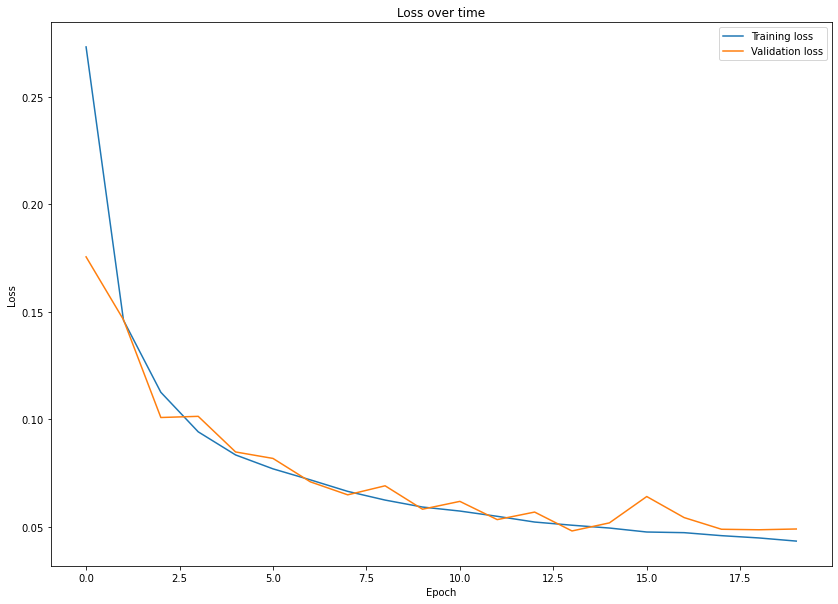

In [84]:
plt.figure(figsize=(14,10))

epochs_range= range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over time')
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test,y_test)  